In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import os

In [3]:
df = pd.read_csv('winequality-red.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
## - Data Prediction

#The several models are used for the prediction.

 #   1. Decision Tree
  #  2. KNeighbors
  #  3. SVC
 #   4. Hierarchial
 #   5. K-Means
    

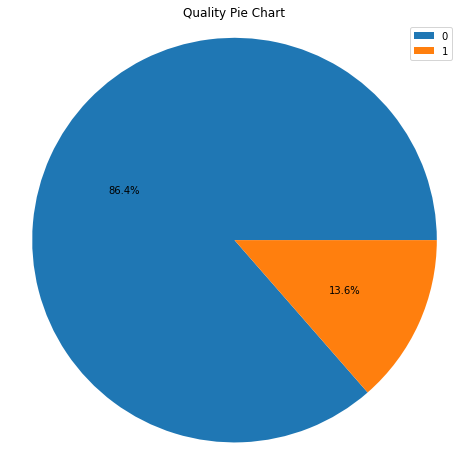

('The good quality wines count for ', 13.6, '%.')


In [19]:
#correlation
df['grade'] = 1 # good
df.grade[df.quality < 7] = 0 # not good

plt.figure(figsize = (8,8))
labels = df.grade.value_counts().index
plt.pie(df.grade.value_counts(), autopct='%1.1f%%')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.title('Quality Pie Chart')
plt.show()
print('The good quality wines count for ',round(df.grade.value_counts(normalize=True)[1]*100,1),'%.')

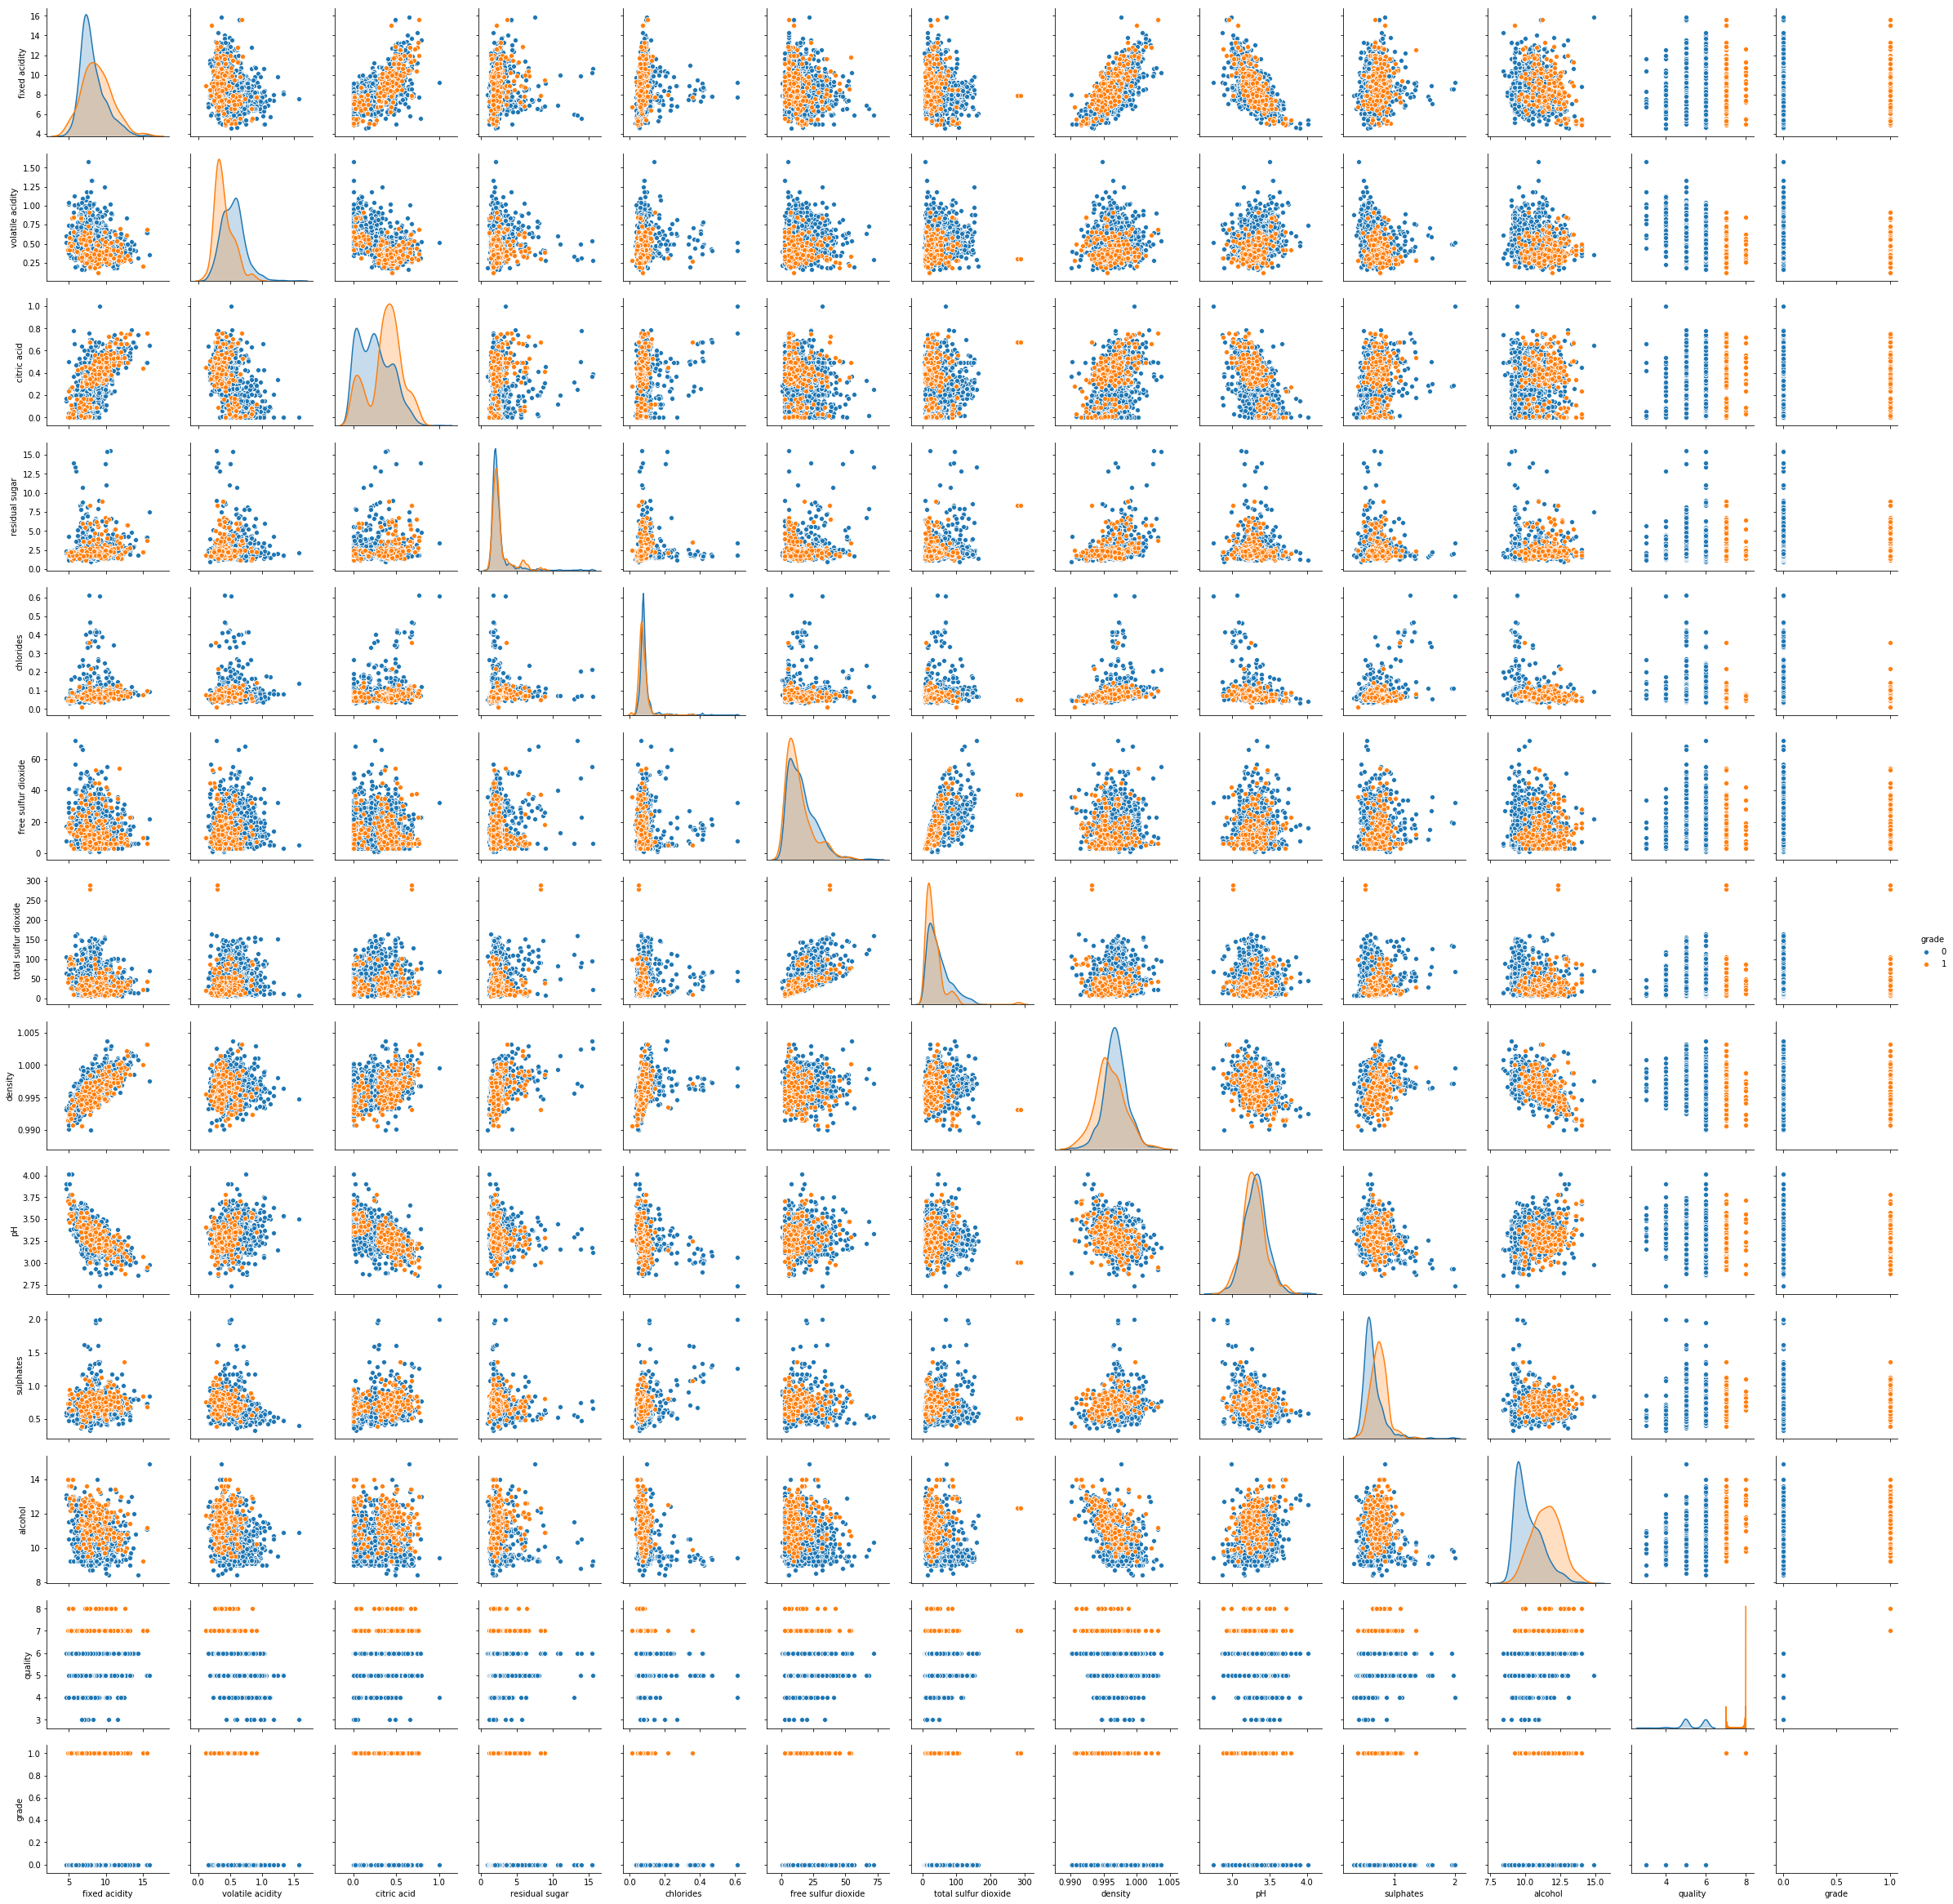

In [7]:
sns.pairplot(df, hue='grade')
plt.show()

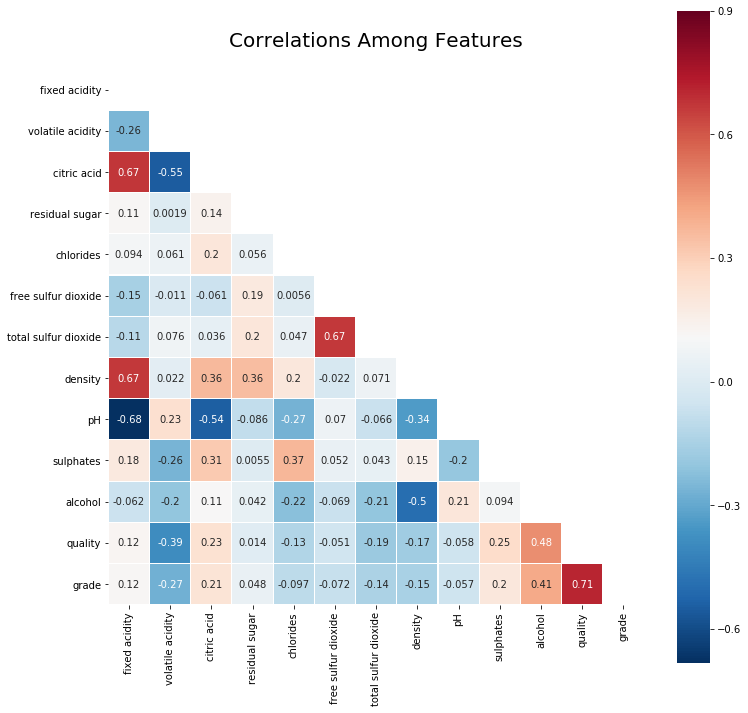

In [26]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (12,12))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

In [29]:
#plt.title('Average of the two groups')
#plt.legend(('Good','Not Good'))
#x = np.linspace(-10,100,10)
#y = 100*np.ones(10)
#plt.plot(x,y,'green')
#plt.show()

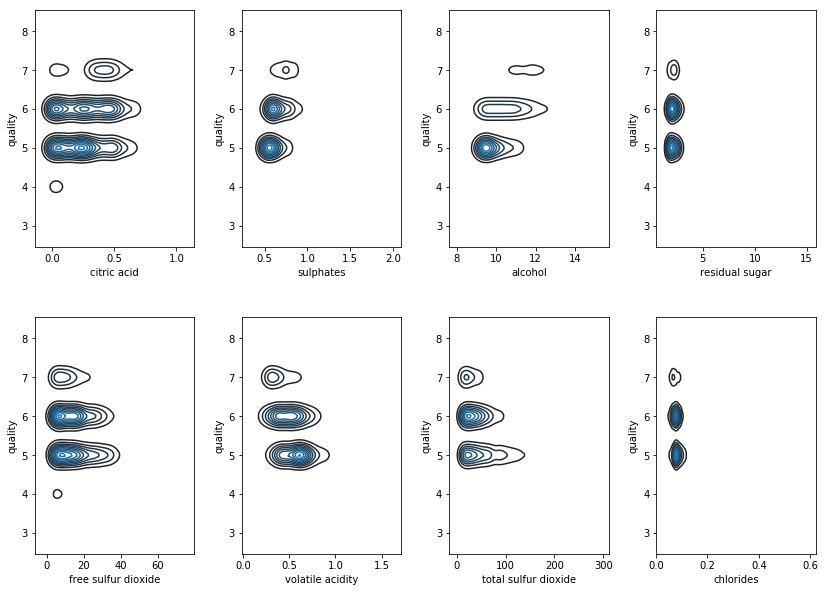

In [42]:
plt.figure(figsize = (14,10))
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

plt.subplot(241) 
sns.kdeplot(df['citric acid'], df['quality'])
plt.subplot(242)
sns.kdeplot(df['sulphates'], df['quality'])
plt.subplot(243)
sns.kdeplot(df['alcohol'], df['quality'])
plt.subplot(244)
sns.kdeplot(df['residual sugar'], df['quality'])

plt.subplot(245)
sns.kdeplot(df['free sulfur dioxide'], df['quality'])
plt.subplot(246)
sns.kdeplot(df['volatile acidity'], df['quality'])
plt.subplot(247)
sns.kdeplot(df['total sulfur dioxide'], df['quality'])
plt.subplot(248)
sns.kdeplot(df['chlorides'], df['quality'])
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

df_train_features = df.drop(['quality','grade'], axis =1)
n = 11

x_train, x_test, y_train,y_test = train_test_split(df_train_features, df['grade'], test_size=0.1, random_state=7)

x_train_mat = x_train.values.reshape((len(x_train), n))
x_test_mat = x_test.values.reshape((len(x_test), n))


In [14]:

print('Start Predicting...')

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train_mat,y_train)
tree_pred = decision_tree.predict(x_test_mat)


KN = KNeighborsClassifier()
KN.fit(x_train_mat,y_train)
KN_pred = KN.predict(x_test_mat)

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
hier_pred=cluster.fit_predict(x_test_mat)


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
fit_y = kmeans.fit(x_train_mat)
knn_pred = kmeans.predict(x_test_mat)

svc = SVC()
svc.fit(x_train_mat,y_train)
svc_pred = svc.predict(x_test_mat)



print('...Complete')

Start Predicting...
...Complete


In [36]:
# Obtain Accuracy Scores for the test set
print('Accuracy Score:-')
print('Decision Tree:', accuracy_score(y_test, tree_pred)*100,'%')

print('KNeighbors:',accuracy_score(y_test, KN_pred)*100,'%')

print('SVC:',accuracy_score(y_test, svc_pred)*100,'%')

print('hierarchial:',accuracy_score(y_test, hier_pred)*100,'%')
print('kmeans:',accuracy_score(y_test, knn_pred)*100,'%')

Accuracy Score:-
('Decision Tree:', 89.375, '%')
('KNeighbors:', 87.5, '%')
('SVC:', 90.625, '%')
('hierarchial:', 36.25, '%')
('kmeans:', 71.25, '%')
